In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

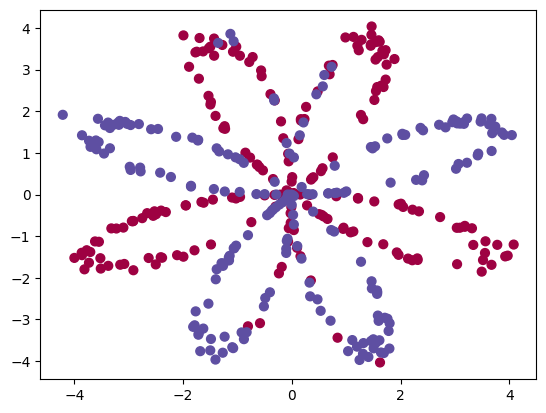

In [2]:
X,Y = load_planar_dataset()

plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

In [3]:
shape_X = X.shape
shape_Y = Y.shape
m = (X.size) / shape_X[0]

print('The shape of X is: ' + str(shape_X))
print('The shape of Y is: ' + str(shape_Y))
print("I have m = %d training examples" % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples


In [4]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

/home/neville/Documents/Programming/Artificial Intelligence/AI_ML/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1780: FutureWarning: The default value for l1_ratios will change from None to (0.0,) in version 1.10. From version 1.10 onwards, only array-like with values in [0, 1] will be allowed, None will be forbidden. To avoid this warning, explicitly set a value, e.g. l1_ratios=(0,).
  warnings.warn(
/home/neville/Documents/Programming/Artificial Intelligence/AI_ML/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1823: FutureWarning: The fitted attributes of LogisticRegressionCV will be simplified in scikit-learn 1.10 to remove redundancy. Set`use_legacy_attributes=False` to enable the new behavior now, or set it to `True` to silence this warning during the transition period while keeping the deprecated behavior for the time being. The default value of use_legacy_attributes will change from True to False in scikit-learn 1.10. See the docstring of L

,"Cs Cs: int or list of floats, default=10Each of the values in Cs describes the inverse of regularizationstrength. If Cs is as an int, then a grid of Cs values are chosenin a logarithmic scale between 1e-4 and 1e4.Like in support vector machines, smaller values specify strongerregularization.",10
,"l1_ratios l1_ratios: array-like of shape (n_l1_ratios), default=NoneFloats between 0 and 1 passed as Elastic-Net mixing parameter (scaling betweenL1 and L2 penalties). For `l1_ratio = 0` the penalty is an L2 penalty. For`l1_ratio = 1` it is an L1 penalty. For `0 < l1_ratio < 1`, the penalty is acombination of L1 and L2.All the values of the given array-like are tested by cross-validation and theone giving the best prediction score is used... warning:: Certain values of `l1_ratios`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... deprecated:: 1.8 `l1_ratios=None` is deprecated in 1.8 and will raise an error in version 1.10. Default value will change from `None` to `(0.0,)` in version 1.10.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"cv cv: int or cross-validation generator, default=NoneThe default cross-validation generator used is Stratified K-Folds.If an integer is provided, it specifies the number of folds, `n_folds`, used.See the module :mod:`sklearn.model_selection` module for thelist of possible cross-validation objects... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer dual=False whenn_samples > n_features.",False
,"penalty penalty: {'l1', 'l2', 'elasticnet'}, default='l2'Specify the norm of the penalty:- `'l2'`: add a L2 penalty term (used by default);- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"scoring scoring: str or callable, default=NoneThe scoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)``. See :ref:`scoring_callable` for details.- `None`: :ref:`accuracy ` is used.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass` problems (`n_classes >= 3`), all solvers except 'liblinear' minimize the full multinomial loss, 'liblinear' will raise an error.- 'newton-cholesky' is a good choice for `n_samples` >> `n_features * n_classes`, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on `n_features * n_classes` because it explicitly computes the full Hessian matrix.- For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones;- 'liblinear' might be slower in :class:`LogisticRegressionCV` because it does not handle warm-starting.- 'liblinear' can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclass 

/tmp/ipykernel_7854/3905537536.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1-LR_predictions))/float(Y.size)*100) +


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


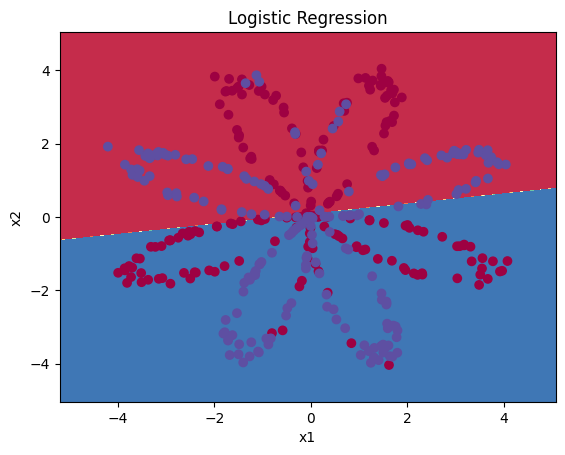

In [5]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

LR_predictions = clf.predict(X.T)
print('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1-LR_predictions))/float(Y.size)*100) +
        '% ' + "(percentage of correctly labelled datapoints)")

In [6]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]

    return n_x, n_h, n_y

In [7]:
# Defining the neural network structure
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [8]:
# Initialize the model's Parameters
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer

    Returns:
    params -- python dictionary containing your parameter:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2)

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2,
    }

    return parameters

In [9]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [18]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))

    cache = {
        "Z1" : Z1, 
        "A1" : A1, 
        "Z2" : Z2, 
        "A2" : A2
    }

    return A2, cache

In [19]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

print(np.mean(cache["Z1"]), np.mean(cache['A1']), np.mean(cache["Z2"]), np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [12]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" label vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2, and b2

    Returns:
    cost -- cross-entropy cost given equation (13)
    """

    m = Y.shape[1]    #number of training examples

    logprops = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - (np.sum(logprops) / m)

    cost = float(np.squeeze(cost))
    assert(isinstance(cost, float))

    return cost

In [13]:
A2, Y_assess, parameters = compute_cost_test_case()
print("Cost = " + str(compute_cost(A2, Y_assess, parameters)))

Cost = 0.6930587610394646


In [14]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backend propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """

    m = X.shape[1]

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]

    dZ2 = A2 - Y
    dW2 = (np.dot(dZ2, A1.T)) / m
    db2 = (np.sum(dZ2, axis=1, keepdims=True)) / m
    dZ1 = np.multiply((np.dot(W2.T, dZ2)), (1 - np.power(A1, 2)))
    dW1 = (np.dot(dZ1, X.T)) / m
    db1 = (np.sum(dZ1, axis=1, keepdims=True)) / m

    grads = {
        "dW1" : dW1,
        "dW2" : dW2,
        "db1" : db1,
        "db2" : db2
    }

    return grads

In [15]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))


dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [16]:
def update_parameters(parameters, grads, learning_rate):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - (learning_rate * dW1)
    W2 = W2 - (learning_rate * dW2)
    b1 = b1 - (learning_rate * db1)
    b2 = b2 - (learning_rate * db2)

    parameters = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2,
    }

    return parameters

In [17]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [20]:
def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 1000 == 0:
            print('Cost after iteration %i: %f' %(i, cost))
    return parameters

In [21]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, 1.02, num_iterations=10000, print_cost=True)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.000257
Cost after iteration 2000: 0.000127
Cost after iteration 3000: 0.000084
Cost after iteration 4000: 0.000063
Cost after iteration 5000: 0.000050
Cost after iteration 6000: 0.000042
Cost after iteration 7000: 0.000036
Cost after iteration 8000: 0.000031
Cost after iteration 9000: 0.000028
W1 = [[-0.65400312  1.21068652]
 [-0.75688005  1.38443617]
 [ 0.57449374 -1.0957478 ]
 [ 0.76242342 -1.40517716]]
b1 = [[ 0.2841426 ]
 [ 0.34699428]
 [-0.23981061]
 [-0.35351855]]
W2 = [[-2.42329584 -3.22274999  1.97978376  3.31771228]]
b2 = [[0.20282644]]


In [22]:
def predict(parameters, X):
    """
    Using the learned parameters, predict a class for each example in x.

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)

    return predictions

In [23]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219420
Cost after iteration 9000: 0.218548


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

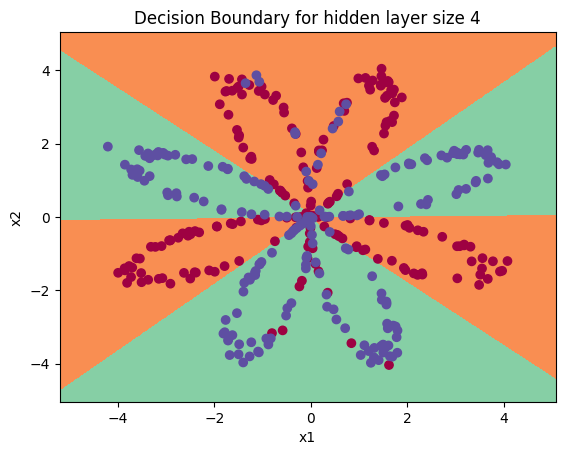

In [25]:
parameters = nn_model(X, Y, 4, 1.2, num_iterations=10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [27]:
predictions = predict(parameters, X)
print("Accuracy: %d" % float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


/tmp/ipykernel_7854/2388891117.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Accuracy: %d" % float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100) + '%')


/tmp/ipykernel_7854/2803250786.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100)


Accuract for 1 hidden units: 67.5 %
Accuract for 2 hidden units: 67.25 %
Accuract for 3 hidden units: 90.75 %
Accuract for 4 hidden units: 90.5 %
Accuract for 5 hidden units: 91.25 %
Accuract for 20 hidden units: 90.5 %
Accuract for 50 hidden units: 90.25 %


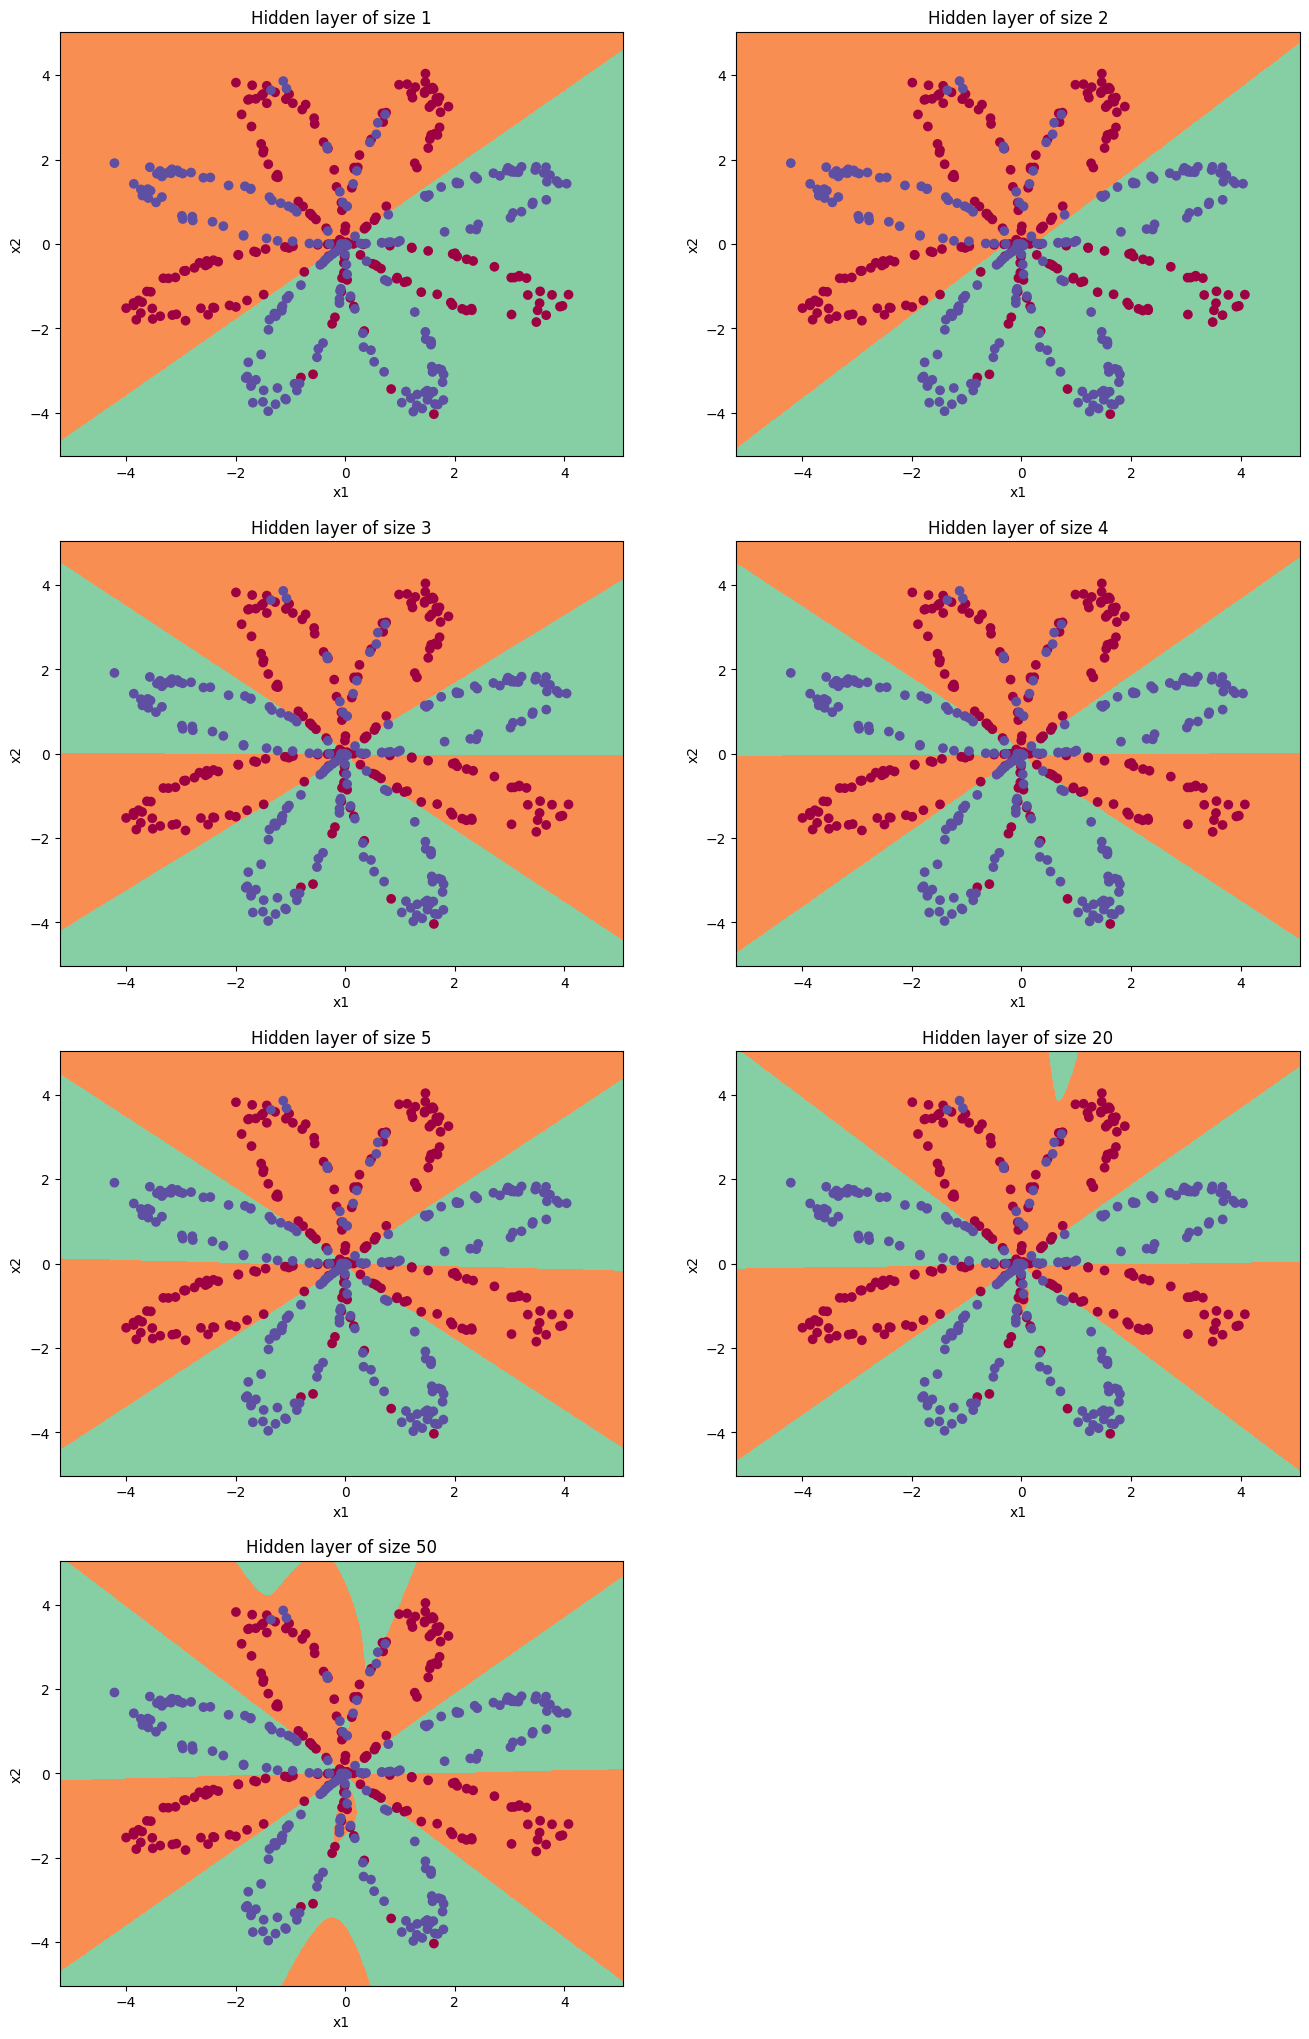

In [28]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title("Hidden layer of size %d" % n_h)
    parameters = nn_model(X, Y, n_h, 1.2, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100)
    print("Accuract for {} hidden units: {} %".format(n_h, accuracy))

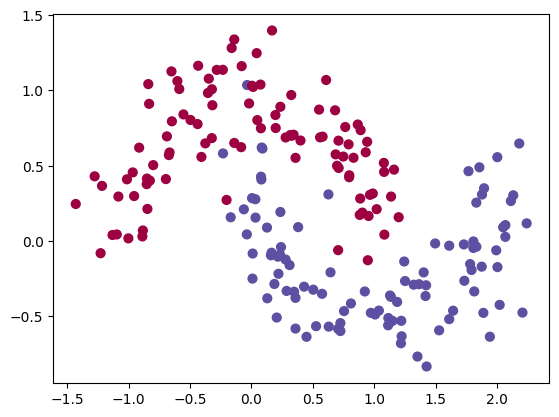

In [29]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {
    "noisy_circles": noisy_circles,
    "noisy_moons": noisy_moons,
    "blobs": blobs,
    "gaussian_quantiles": gaussian_quantiles
}

dataset = "noisy_moons"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

if dataset == "blobs":
    Y = Y%2

plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)